### Problem Statement and Basic Metrics Analysis

1. **Content Popularity Analysis**:
   - Identify the most popular genres, themes, and formats of content among subscribers in various countries. Analyze viewing patterns, ratings, and feedback to understand audience preferences.
   - Explore metrics such as viewership duration, and user engagement to gauge the success of different types of content.

2. **Market Segmentation**:
   - Segment the audience based on different type of modes of viewership like **TV Shows** or **Movies**.
   - Identify what can be the best periods to deliver a particular content and what kind of content is available in different countries.

3. **Content Performance Metrics**:
   - Evaluate the performance of existing content in terms of viewer retention, audience satisfaction, and critical acclaim.
   - Identify trends and patterns in viewer behavior to inform content production decisions and optimize the content library for maximum engagement.

4. **Localization and Cultural Relevance**:
   - Analyze the success of localized content and its impact on subscriber growth and retention in different markets.
   - Determine the level of cultural relevance and authenticity required to resonate with audiences in specific regions and time periods.

5. **User Feedback and Recommendations**:
   - Gather insights from user reviews, ratings, and recommendations to understand audience preferences and improve content selection algorithms.
   - Understand what kind of genres are more popular than others and visual analysis as much as possible to understand key points regarding preferences.

By addressing these key areas of analysis, Netflix can gain valuable insights into viewer preferences, market dynamics, and growth opportunities to optimize its content strategy and drive business expansion in diverse countries.


**First let's import all the required python libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
netflix_df = pd.read_csv('netflix.csv')

### Information about the dataset and important Non-Graphical Analysis

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_df.shape

(8807, 12)

In [5]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**_Insight:_** The above mentioned cell gives us the information about all the columns, their data types and Non-Null Count.

In [7]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**_Insight :_** The above cell gives us the possible numerical values and giving us some insight about the data.

In [8]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**_Insight:_** The above cell shows us the count of null values in all the columns of the dataset.

In [9]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**_Insight:_** The above cell gives us the number of unique values present in the dataset.

In [10]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

In [11]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Visual Analysis
Here I have used various plots like
- *Line plot*
- *Box plot*
- *Heatmap*
- *Pie Chart*
- *Bar Chart*

We have used the aforementioned plots and charts for :-
- Contineous Variable(s)
- Categorical Variales(s)
- Correlation   

#### 1. How has the number of movies released per year changed over the last 20-30 years?

In [12]:
movies_df = netflix_df[netflix_df['type'] == 'Movie']

In [13]:
movies = movies_df.groupby('release_year')['title'].count()

In [14]:
movies.sort_index(ascending = False)

release_year
2021    277
2020    517
2019    633
2018    767
2017    767
       ... 
1946      1
1945      3
1944      3
1943      3
1942      2
Name: title, Length: 73, dtype: int64

In [15]:
movies_last_30_years = movies.tail(30)

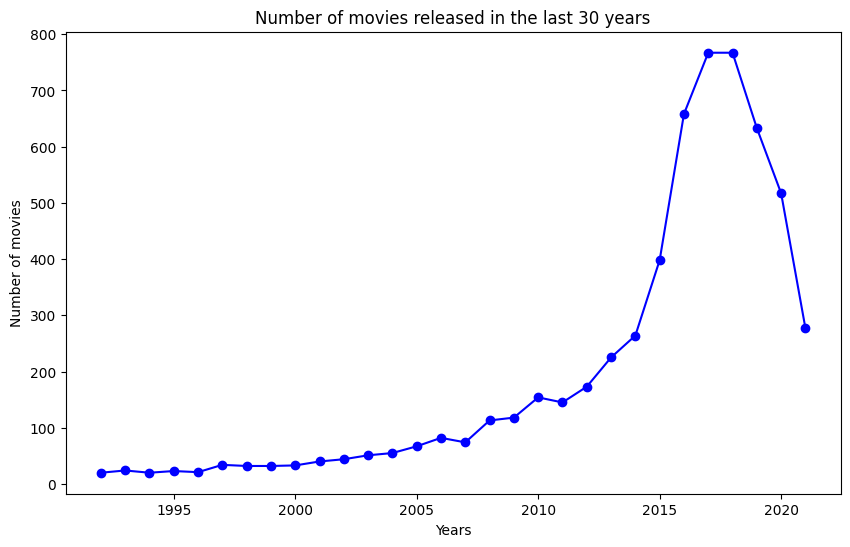

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(movies_last_30_years.index, movies_last_30_years.values, marker='o', color='b', linestyle='-')
plt.title('Number of movies released in the last 30 years')
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.show()

**Insight -** The above graph shows us that the number of movies released in the last 30 years has been increasing at an extraordinary rate. This must have been because of globalisation and access to more markets thereby giving filmakers incentive to make more movies. However, we notice a sharp downward trend in 2020. This is the result of covid pandemic which englufed the world for most of the following 2 years.

#### 2. Comparison of TV Shows and Movies

In [17]:
movies = netflix_df[netflix_df['type'] == 'Movie']
tv_show = netflix_df[netflix_df['type'] == 'TV Show']

In [18]:
movies_per_year = movies.groupby('release_year')['show_id'].count()
tv_show_per_year = tv_show.groupby('release_year')['show_id'].count()

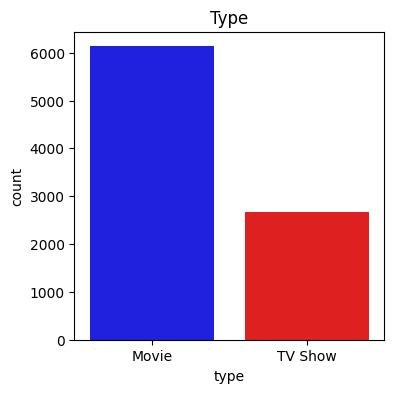

In [19]:
sns.countplot(data=netflix_df, hue = 'type', x='type', palette=['blue', 'red'], legend = False)
plt.title('Type')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(4, 4)
plt.show()

**Insight-** The above _countplot_ shows us that the number of movies being made is vastly more than number of TV Shows being made. From this we can infer that it is more profitable to release movies on netflix than TV Shows.

#### 3. What is the best time to launch a TV show?

In [20]:
tv_show.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [21]:
tv_show['Month'] = tv_show['date_added'].dt.month

In [22]:
tv_show['Month']

1        9.0
2        9.0
3        9.0
4        9.0
5        9.0
        ... 
8795     5.0
8796     1.0
8797     9.0
8800    12.0
8803     7.0
Name: Month, Length: 2676, dtype: float64

In [23]:
tv_show_counts = tv_show.groupby('Month')['title'].count().reset_index()

In [24]:
tv_show_counts.columns = ['Month', 'Number of TV Shows Released']

<Axes: xlabel='Month', ylabel='Number of TV Shows Released'>

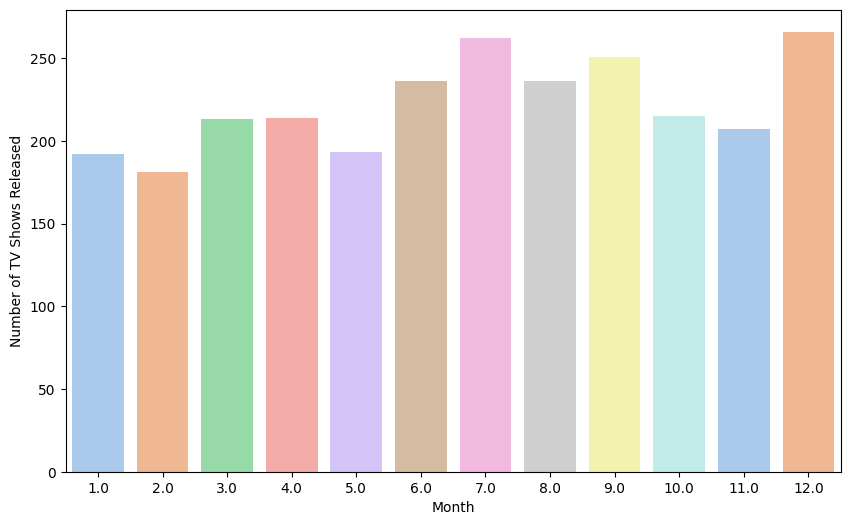

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Number of TV Shows Released', data=tv_show_counts, palette = 'pastel')

**Insight-** In the above figure, we have used _barplot_ to show the number of TV Shows released in each month. This gives us a fair idea which could be the best month to release a TV Show on Netflix. We infer that the 7th month i.e. July and 12th month i.e. December are the best months to release a TV Show.

In [26]:
movies['week'] = movies['date_added'].dt.isocalendar().week

In [27]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",38
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,38
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,38


In [28]:
movies.groupby('week')['title'].count().head()

week
1    316
2     78
3     81
4     56
5    135
Name: title, dtype: int64

In [29]:
movies_cleaned = movies.dropna(subset=['week'])

In [30]:
week_counts = movies_cleaned.groupby('week')['title'].count().reset_index()

In [31]:
heatmap_data = week_counts.pivot('week', 'title', 'title').fillna(0)

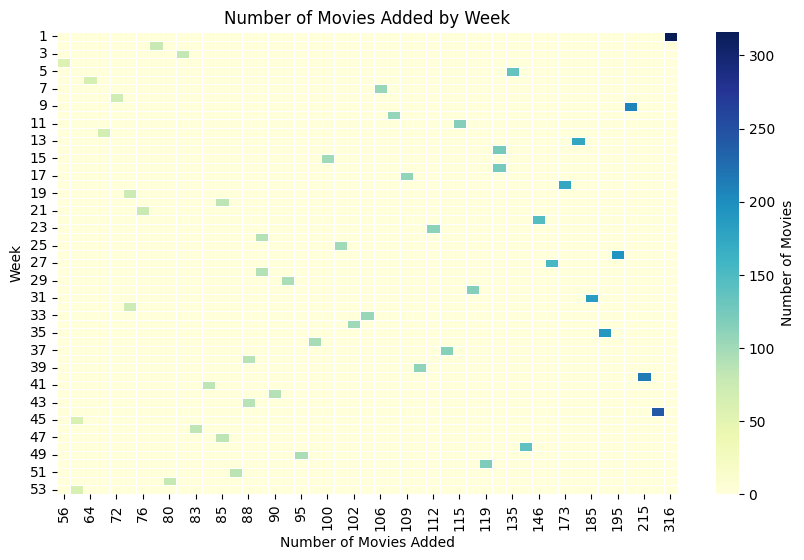

In [32]:
plt.figure(figsize = (10,6))
sns.heatmap(data = heatmap_data, cmap = 'YlGnBu', linewidth = .5, cbar_kws = {'label': 'Number of Movies'})
plt.xlabel('Number of Movies Added')
plt.ylabel('Week')
plt.title('Number of Movies Added by Week')
plt.show()

**Insight-** Here we have done the same analysis for number of movies being released during most of the weeks in a year. On the x-axis it gives us the numbe rof movies added and on the y-axis it gives us the week number during which the number of movies were added. From the _heatmap_ we see that almost 300 movies were released in _1st_ week and the least number of movies were released in the _53rd_ week.

#### 4. Does Netflix have more focus on TV Shows than movies in recent years

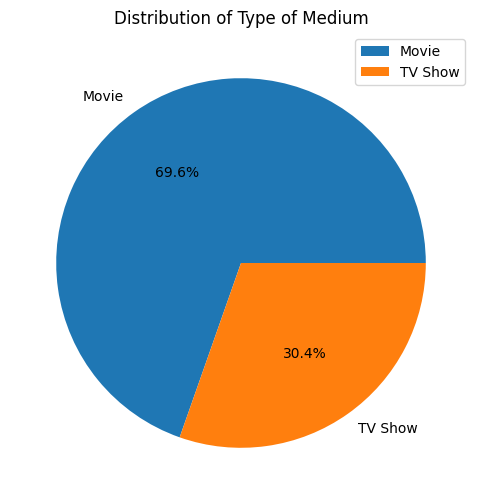

In [33]:
size = netflix_df['type'].value_counts()
labels = ['Movie', 'TV Show']

plt.figure(figsize=(10, 6))
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Type of Medium')
plt.legend()
plt.show()

**Insight-** No, from the pie chart we see that Movies is the overwhelming preference for Netflix as opposed to TV Shows.

#### 5. Understanding what content is available in different countries

In [34]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [35]:
netflix_df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [36]:
con_df = netflix_df[['show_id', 'country', 'listed_in']]

In [37]:
con_df = con_df.dropna()

In [38]:
con_df.head(4)

,show_id,country,listed_in
0,s1,United States,Documentaries
1,s2,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
4,s5,India,"International TV Shows, Romantic TV Shows, TV ..."
7,s8,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies"


In [39]:
def split(s):
  return str(s).split(', ')
con_df['Types'] = con_df.listed_in.apply(split)
con_df.head(4)

,show_id,country,listed_in,Types
0,s1,United States,Documentaries,[Documentaries]
1,s2,South Africa,"International TV Shows, TV Dramas, TV Mysteries","[International TV Shows, TV Dramas, TV Mysteries]"
4,s5,India,"International TV Shows, Romantic TV Shows, TV ...","[International TV Shows, Romantic TV Shows, TV..."
7,s8,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International Mov..."


**Insight-** In order to understand and analyze the types in listed_in, we have to first do nesting in the listed_in column and then do further analysis.

In [40]:
con_df = con_df.explode('Types')
con_df.head(4)

,show_id,country,listed_in,Types
0,s1,United States,Documentaries,Documentaries
1,s2,South Africa,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
1,s2,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas
1,s2,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries


In [41]:
del con_df['listed_in']

In [42]:
con_df.head(4)

,show_id,country,Types
0,s1,United States,Documentaries
1,s2,South Africa,International TV Shows
1,s2,South Africa,TV Dramas
1,s2,South Africa,TV Mysteries


In [43]:
x = con_df.groupby('country')['Types'].value_counts()

In [44]:
print(x)

country            Types                 
, France, Algeria  Dramas                    1
                   Independent Movies        1
                   International Movies      1
, South Korea      International TV Shows    1
                   TV Dramas                 1
                                            ..
West Germany       Documentaries             1
                   International Movies      1
Zimbabwe           Comedies                  1
                   International Movies      1
                   Romantic Movies           1
Name: Types, Length: 2977, dtype: int64


**Insight-** The above code gives us the how many types of shows and movies are present in the countries. Here we notice that there are multiple countries in the same row. This means we are not getting a clear picture hence, we need to do nesting on the country column as well.

In [45]:
def split(s):
  return str(s).split(', ')
con_df['Country'] = con_df.country.apply(split)
con_df.head(4)

,show_id,country,Types,Country
0,s1,United States,Documentaries,[United States]
1,s2,South Africa,International TV Shows,[South Africa]
1,s2,South Africa,TV Dramas,[South Africa]
1,s2,South Africa,TV Mysteries,[South Africa]


In [46]:
con_df = con_df.explode('Country')
con_df.head(4)

,show_id,country,Types,Country
0,s1,United States,Documentaries,United States
1,s2,South Africa,International TV Shows,South Africa
1,s2,South Africa,TV Dramas,South Africa
1,s2,South Africa,TV Mysteries,South Africa


In [47]:
del con_df['country']

In [48]:
con_df.head(5)

,show_id,Types,Country
0,s1,Documentaries,United States
1,s2,International TV Shows,South Africa
1,s2,TV Dramas,South Africa
1,s2,TV Mysteries,South Africa
4,s5,International TV Shows,India


In [49]:
del con_df['show_id']

In [50]:
con_df.head(4)

,Types,Country
0,Documentaries,United States
1,International TV Shows,South Africa
1,TV Dramas,South Africa
1,TV Mysteries,South Africa


In [51]:
grouped_df = con_df.groupby(['Types', 'Country']).size().reset_index(name = 'Count')

**Insight-** Now we have done the nesting of both the columns and have done group by which in the end gives us the count of number of shows and movies in each country in each genre.

In [52]:
grouped_df.head(4)

,Types,Country,Count
0,Action & Adventure,Angola,1
1,Action & Adventure,Argentina,3
2,Action & Adventure,Australia,13
3,Action & Adventure,Bahamas,1


In [53]:
country_count = grouped_df.groupby('Country')['Count'].sum().reset_index()
print(country_count)

          Country  Count
0                      5
1     Afghanistan      2
2         Albania      2
3         Algeria      8
4          Angola      2
..            ...    ...
122  Vatican City      3
123     Venezuela      8
124       Vietnam     20
125  West Germany     11
126      Zimbabwe      7

[127 rows x 2 columns]


In [54]:
top_5_countries = country_count.sort_values(by = 'Count', ascending = False).head(5)
top_5_countries

,Country,Count
119,United States,6779
47,India,2804
117,United Kingdom,1779
38,France,916
22,Canada,877


In [55]:
grouped_df_top_5 = grouped_df[grouped_df['Country'].isin(top_5_countries['Country'])]
grouped_df_top_5

,Types,Country,Count
8,Action & Adventure,Canada,44
16,Action & Adventure,France,37
22,Action & Adventure,India,137
56,Action & Adventure,United Kingdom,84
57,Action & Adventure,United States,404
...,...,...,...
1373,Thrillers,Canada,49
1380,Thrillers,France,44
1385,Thrillers,India,92
1417,Thrillers,United Kingdom,61


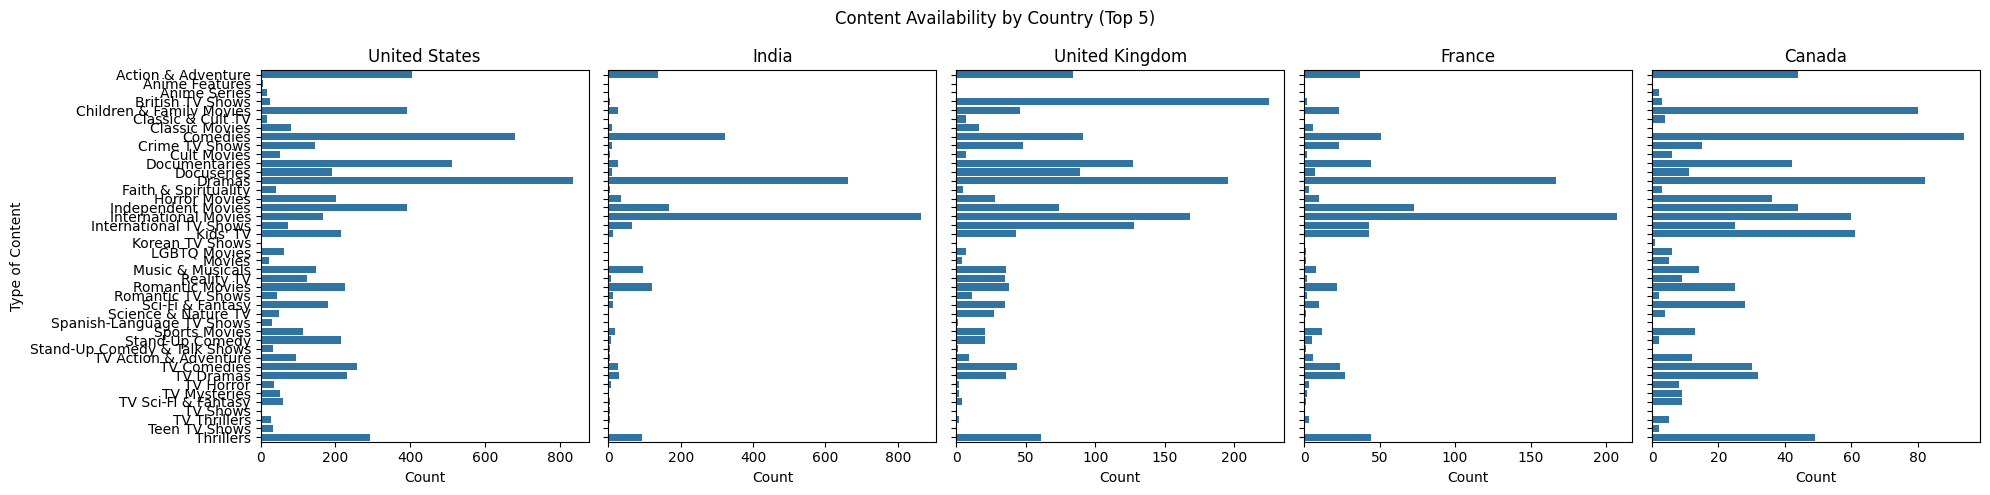

In [56]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
for i, country in enumerate(top_5_countries['Country']):
    country_data = grouped_df_top_5[grouped_df_top_5['Country'] == country]
    sns.barplot(ax=axes[i], x='Count', y='Types', data=country_data)
    axes[i].set_title(country)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Type of Content')

plt.suptitle('Content Availability by Country (Top 5)')
plt.tight_layout()
plt.show()

**Insight-** For simplicity, we have chosen only 5 countries that have the maximum count and using _subplot_ we display 5 graphs showing how much each type of genre is popular in the major countries for Netflix.

#### 6. Analysis of actors/directors of different types of shows/movies.

We can start by finding who is the most popular actor on netflix.

In [57]:
netflix_df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [58]:
cast_df = netflix_df.copy()

In [59]:
#nesting
def split_a_str(s):
  return str(s).split(', ')
cast_df['List of Cast'] = cast_df.cast.apply(split_a_str)
cast_df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,List of Cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[nan]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",[nan]


In [60]:
cast_df = cast_df.explode('List of Cast')
cast_df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,List of Cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane


In [61]:
country_df = netflix_df[['title', 'country']]
country_df.head(4)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Jailbirds New Orleans,NaN


In [62]:
country_df['Countries'] = country_df.country.apply(split_a_str)
country_df.head(4)

,title,country,Countries
0,Dick Johnson Is Dead,United States,[United States]
1,Blood & Water,South Africa,[South Africa]
2,Ganglands,NaN,[nan]
3,Jailbirds New Orleans,NaN,[nan]


In [63]:
country_df = country_df.explode('Countries')

In [64]:
country_df.head(4)

,title,country,Countries
0,Dick Johnson Is Dead,United States,United States
1,Blood & Water,South Africa,South Africa
2,Ganglands,NaN,nan
3,Jailbirds New Orleans,NaN,nan


In [65]:
cast_df = cast_df[['title', 'cast', 'List of Cast']]

In [66]:
merge_df = pd.merge(left= cast_df, right = country_df, on = 'title')
merge_df.head()

,title,cast,List of Cast,country,Countries
0,Dick Johnson Is Dead,NaN,nan,United States,United States
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa
2,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Khosi Ngema,South Africa,South Africa
3,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Gail Mabalane,South Africa,South Africa
4,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Thabang Molaba,South Africa,South Africa


In [67]:
merge_df.groupby(['List of Cast', 'Countries'])['title'].nunique().sort_values(ascending = False)

List of Cast         Countries     
nan                  United States     406
                     nan               154
                     United Kingdom     96
Anupam Kher          India              40
nan                  India              39
                                      ... 
Juana Viale          United States       1
Boubker Ait El Caid  France              1
Botho Molohloane     South Africa        1
Juanita de Villiers  South Africa        1
Ṣọpẹ́ Dìrísù         United Kingdom      1
Name: title, Length: 54892, dtype: int64

Let's again do it but this time dropping all nan values

In [68]:
merge_copy_df = merge_df.copy()

In [69]:
merge_copy_df.dropna(inplace=True)

In [70]:
merge_copy_df.groupby(['List of Cast', 'Countries'])['title'].nunique().sort_values(ascending = False)

List of Cast      Countries     
Anupam Kher       India             40
Shah Rukh Khan    India             34
Naseeruddin Shah  India             31
Om Puri           India             29
Akshay Kumar      India             29
                                    ..
Imran Tareen      Pakistan           1
Imtiaz Ali        India              1
In Deok Hwang     Taiwan             1
In Gyo-jin        South Korea        1
Ṣọpẹ́ Dìrísù      United Kingdom     1
Name: title, Length: 50889, dtype: int64

In [71]:
merge_copy_df

,title,cast,List of Cast,country,Countries
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata,South Africa,South Africa
2,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Khosi Ngema,South Africa,South Africa
3,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Gail Mabalane,South Africa,South Africa
4,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Thabang Molaba,South Africa,South Africa
5,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Dillon Windvogel,South Africa,South Africa
...,...,...,...,...,...
81703,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Manish Chaudhary,India,India
81704,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Meghna Malik,India,India
81705,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Malkeet Rauni,India,India
81706,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",Anita Shabdish,India,India


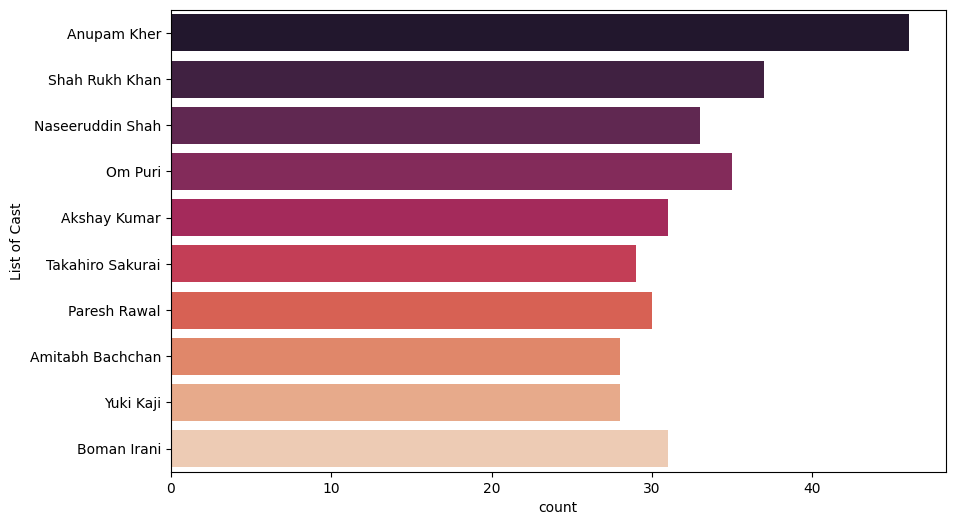

In [72]:
plt.figure(figsize=(10, 6))
counts_df = merge_copy_df.groupby(['List of Cast', 'Countries'])['title'].nunique().reset_index()
counts_df = counts_df.sort_values(by='title', ascending=False)
top_10_counts_df = counts_df.head(10)
sns.countplot(data=merge_copy_df, y='List of Cast', order=top_10_counts_df['List of Cast'], palette='rocket')
plt.show()

**Insight-** Using nesting and groupby we find out the most popular actors on Netflix. From the above graph we infer that _Anupam Kher_ is the most popular actor on Netflix.

### Who are the top 10 directors on Netflix with most releases

In [73]:
netflix_df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

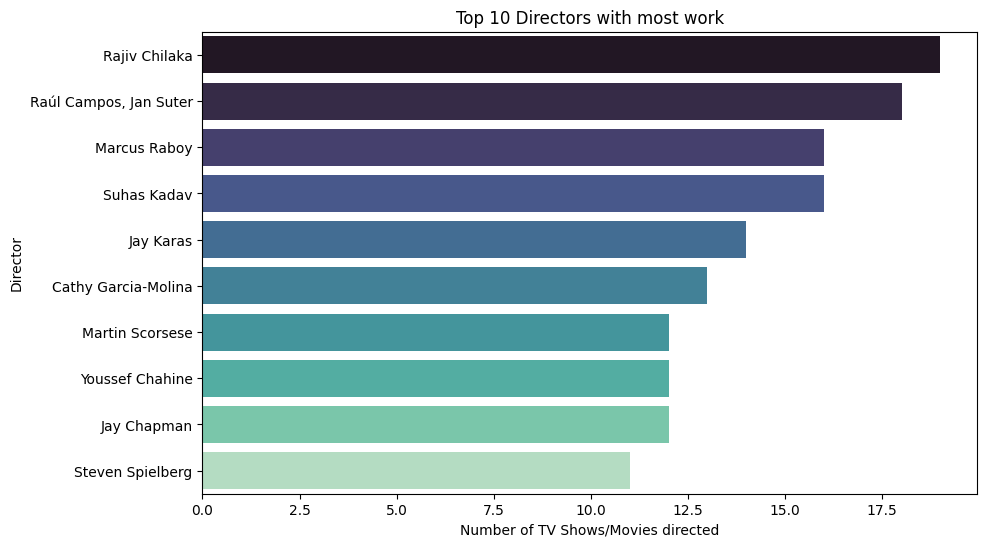

In [74]:
plt.figure(figsize= (10,6))
sns.countplot(y = netflix_df['director'], order = netflix_df['director'].value_counts().index[:10], palette = 'mako')
plt.title('Top 10 Directors with most work')
plt.xlabel('Number of TV Shows/Movies directed')
plt.ylabel('Director')
plt.show()

**Insight-** Luckily, for the directors, we don't have to do any nesting. We can simply use countplot and find out which director has directed most number of TV Shows and Movies. The answer to that is **Rajiv Chilaka**.

### Netflix content By Ratings.

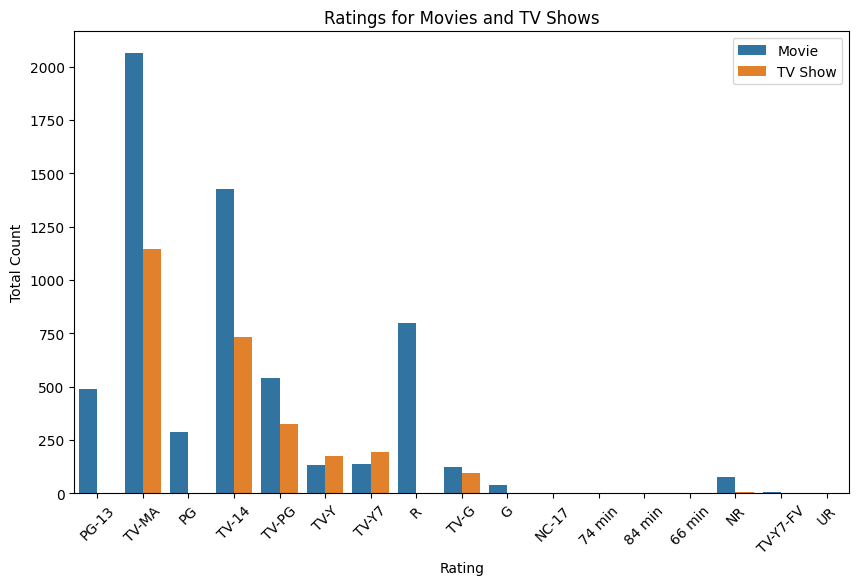

In [75]:
plt.figure(figsize = (10,6))
sns.countplot(data = netflix_df, x = netflix_df.rating, hue = netflix_df.type)
plt.title('Ratings for Movies and TV Shows')
plt.xlabel('Rating')
plt.ylabel('Total Count')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

**Insight-** So far, we have not paid much attention to how ratings are popular across data. For that, we have drawn a countplot with hue = netflix_df.type to give the distinction between TV Shows and Movies.

### Miscellaneous Analysis

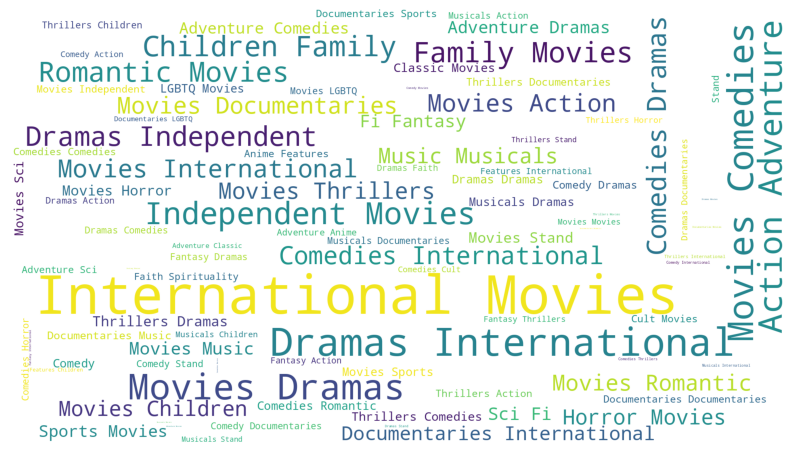

In [76]:
plt.subplots(figsize = (10,6))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix_df[netflix_df['type'] == 'Movie']['listed_in']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

**Insight-** In order to display which type of movies are more popular, we have used *wordcloud*. This helps us in seeing all the major and important and major genres in a bigger font and different colour than others.

After how many days the movie will be added to Netflix after the release of
the movie

In [77]:
netflix_df['release_year'] = pd.to_datetime(netflix_df['release_year'].astype(str), format='%Y')

In [78]:
netflix_df['release_year'] = netflix_df['release_year'].dt.year

In [79]:
netflix_df['release_year'] = pd.to_datetime(netflix_df['release_year'].astype(str) + '-01-01')

In [80]:
netflix_df['difference_in_days'] = (netflix_df['date_added'] - netflix_df['release_year']).dt.days

In [81]:
ans = netflix_df[['show_id', 'type', 'title', 'difference_in_days']]

In [82]:
ans.head()

,show_id,type,title,difference_in_days
0,s1,Movie,Dick Johnson Is Dead,633.0
1,s2,TV Show,Blood & Water,266.0
2,s3,TV Show,Ganglands,266.0
3,s4,TV Show,Jailbirds New Orleans,266.0
4,s5,TV Show,Kota Factory,266.0


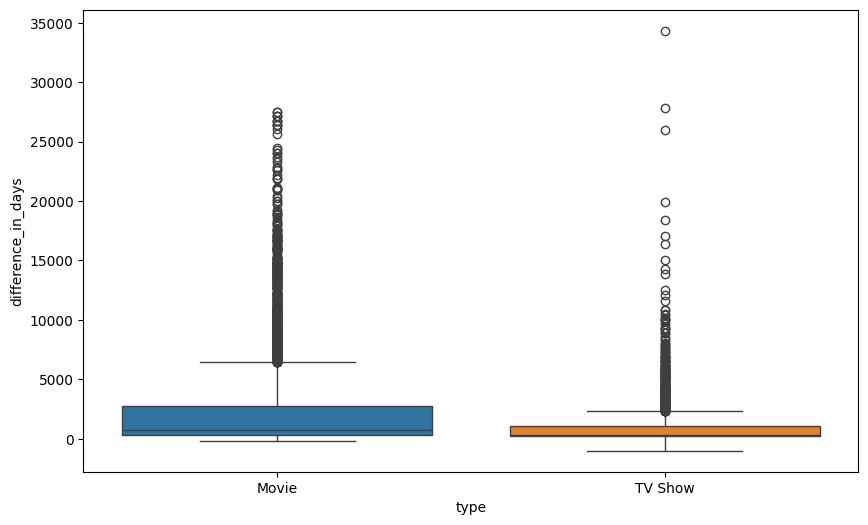

In [83]:
plt.figure(figsize = (10,6))
sns.boxplot(data = ans, x = 'type', y = 'difference_in_days', hue = 'type')
plt.show()

**Insight-** In order to find out the difference in days between release date and the added date, we first add date and month to release year in order to calculate difference in days. As a default we have chosen 1st Jan and then calculate the difference. We have used the box plot to display the numbers for Movie and TV Show because they give us the idea of a median value, low values, high values and outliers. From the plot we can see that in both the cases, Movies and TV Shows, the difference in days is very large and maximum of values lie there only.

#### Top Countries Contribution on Netflix

[]

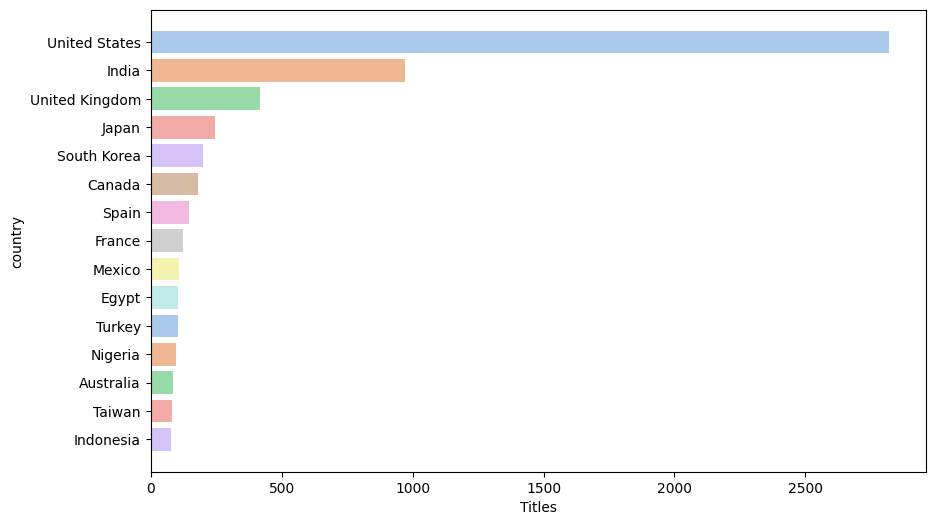

In [84]:
plt.figure(figsize = (10,6))
sns.countplot(data = netflix_df, y = netflix_df.country, order = netflix_df['country'].value_counts().index[:15], palette = 'pastel')
plt.xlabel('Titles')
plt.plot()

#### Missing Value Check

In [85]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,difference_in_days
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",633.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",266.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,266.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",266.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,266.0


**Insight-** In order to check how many missing values are present in the dataset, we first do df.isnull() which gives us all the rows null containing null values and then we do .sum() which gives us the number of null values in each row.

In [86]:
netflix_df.isnull().sum()

show_id                  0
type                     0
title                    0
director              2634
cast                   825
country                831
date_added              10
release_year             0
rating                   4
duration                 3
listed_in                0
description              0
difference_in_days      10
dtype: int64

**Insight-** Now, in order to fill the null values which are represented by `nan` we do one of the following:-
- df_filled = df.fillna(0)
- df_ffill = df.fillna(method='ffill')
- df_bfill = df.fillna(method='bfill')
<br> We can in some cases also the following:-
- df_filled = df['column_name'].fillna(df['column_name'].mean(), inplace = True)

In [87]:
netflix_df['director'].fillna('Name Not Available', inplace = True)

In [88]:
netflix_df['cast'].fillna('Cast Not Available', inplace = True)

In [89]:
netflix_df['country'].fillna(0, inplace = True)

In [90]:
netflix_df['date_added'].fillna(method = 'ffill', inplace = True)

In [91]:
netflix_df['rating'].fillna('NILL', inplace = True)

In [92]:
netflix_df['duration'].fillna(0, inplace = True)

In [93]:
mean_value = netflix_df['difference_in_days'].mean()
netflix_df['difference_in_days'].fillna(mean_value, inplace = True)

## Inferences and Conclusion

We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:

1. The most content type on Netflix is `Movies`.

2. The country by the amount of the produces content is the `United States`,

3. The most popular director on Netflix , with the most titles, is `Rajiv Chilaka`.

4. International Movies is a genre that is mostly in Netflix.

5. largest count of Netflix content is made with a `TV-MA` rating.

6. The most popular actor on Netflix movie, based on the number of titles, is `Anupam Kher`.

It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world.

## Recommendations

1. Netflix should try to increase the number of TV shows by reaching out to customers and understanding what is popular in order to increase it's TV Shows viewership.
2. The number of movies released drastically went down in 2020. Netflix should partner with Production houses and ramp up the production and making of movies as soon as possible.
3. Netflix should focus on genres Action & Adventure, Comedy, Documentaries and Dramas because they are the ones with most viewership and will likely bring more profits for the company.
4. The most popular markets for the company are `United States` and `India` however `United States` is vastly ahead of `India` in terms of number of users so, the company should try to penetrate deeper into Indian market by providing local language content in a very personalized way to each state of India. In the US, it should look for genres where there has not been much success and try to promote them as well.
5. Also, according to the data, the best time to release movies is between `week 1` and `week 15`. As for the TV shows it is the month of `December` and `July`.

All the above recommendations are some of the possible ways in which Netflix can improve its business and increase its viewership. By implementing them, Netflix can strengthen its position in the streaming industry and sustain long term growth.   